<h1>Actividad Integradora 3</h1>
<h2>Equipo 3</h2>
<h3>Fernando Limón Flores A00819824</h3>
<h3>Ricardo Marcelo Lozano Gil A01176405</h3>
<h3>Hector Noel Leon Quiroz A01251806</h3>
<h3>Adrian Mancilla Uribe A01196967</h3>
<h3>Alitzel Adriana Macías Infante A01373166</h3>

<h2>Recolección y procesamiento de datos</h2>

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<h3>Conjunto de entrenamiento</h3>

In [2]:
setPath = 'train'
classes = os.listdir(setPath)
if '.DS_Store' in classes: classes.remove('.DS_Store')
imgNumber = list()

for imgClass in classes:
    images = os.listdir(setPath + "/" + imgClass)
    imgNumber.append(len(images))
    
print(classes)
print(imgNumber)

['ant', 'lion', 'monkey', 'owl', 'turtle']
[6643, 6702, 6599, 6698, 6719]


### Data Augmentation (solo para train set)

In [ ]:
gen = ImageDataGenerator(rotation_range=5, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=5., horizontal_flip=True, vertical_flip=True)

In [ ]:
# Run only once
setPath = 'train'
classes = os.listdir(setPath)
if '.DS_Store' in classes: classes.remove('.DS_Store')
imgNumber = list()

for imgClass in classes:
    images = os.listdir(setPath + "/" + imgClass)
    for image in images:
        image_path = setPath + "/" + imgClass + "/" + image
        n_image = np.expand_dims(plt.imread(image_path),0)
        aug_iter = gen.flow(n_image, save_to_dir=setPath + "/" + imgClass, save_prefix='aug-image-',save_format='jpeg')
        aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
    imgNumber.append(len(images))

print(classes)    
print(imgNumber)

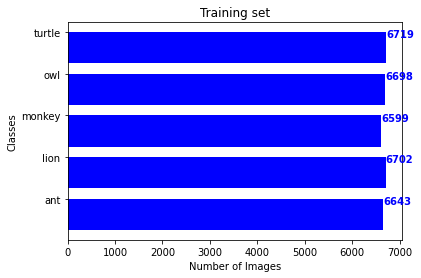

In [3]:
x = classes
y = imgNumber

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(y))
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Training set')
plt.xlabel('Number of Images')
plt.ylabel('Classes')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

<h3>Conjunto de prueba</h3>

In [4]:
setPath = 'test'
classes = os.listdir(setPath)
if '.DS_Store' in classes: classes.remove('.DS_Store')
imgNumber = list()

for imgClass in classes:
    images = os.listdir(setPath + "/" + imgClass)
    imgNumber.append(len(images))
    
print(classes)
print(imgNumber)

['ant', 'lion', 'monkey', 'owl', 'turtle']
[245, 249, 245, 251, 249]


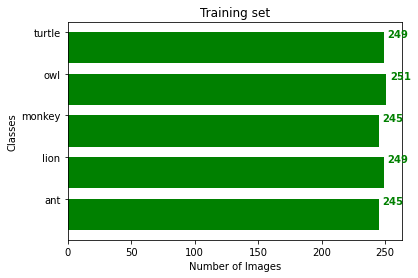

In [5]:
x = classes
y = imgNumber

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(y))
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Training set')
plt.xlabel('Number of Images')
plt.ylabel('Classes')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='green', fontweight='bold')
plt.show()

<h3>Conjunto de validación</h3>

In [6]:
setPath = 'validation'
classes = os.listdir(setPath)
if '.DS_Store' in classes: classes.remove('.DS_Store')
imgNumber = list()

for imgClass in classes:
    images = os.listdir(setPath + "/" + imgClass)
    imgNumber.append(len(images))
    
print(classes)
print(imgNumber)

['ant', 'lion', 'monkey', 'owl', 'turtle']
[124, 126, 124, 126, 125]


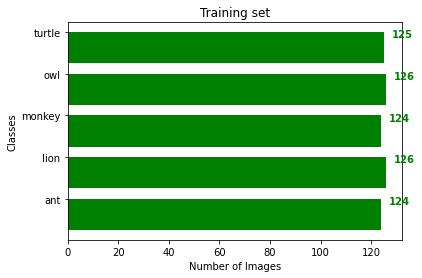

In [7]:
x = classes
y = imgNumber

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(y))
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Training set')
plt.xlabel('Number of Images')
plt.ylabel('Classes')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='green', fontweight='bold')
plt.show()

<h2>Selección y entrenamiento de modelos</h2>

### Metodología

Para el entrenamiento de nuestra red neuronal, los modelos y parámetros que utilizamos fueron los siguientes:

1. Utilizar el modelo VGG16 directo, solo cambiando la útlima capa, para que se ajustara al número de clases que tenemos (5). A todas las demás capas se les asignó el atributo `trainable = False`
2. Lo mismo que el modelo 1, pero a las últimas dos capas, además de la capa de salida, se les asignó `trainable = True`. Las últimas dos capas son de tipo Dense.
3. Lo mismo que el modelo 1, pero a las últimas siete capas, además de la capa de salida, se les asignó `trainable = True`. Las últimas siete capas abarcan el último bloque de capas de convolución y dos capas Dense.

Estos tres modelos se utilizaron bajo distintos escenarios:

- Sin aumentación de datos, con 5 epochs.
- Con aumentación de datos, con 5 epochs.
- Con aumentación de datos, con 10 epochs.

### Observaciones
Encontramos que en el primer escenario, aparecía un sobreajuste de los datos. La precisión tenía un valor de casi 99%, mientras que la precisión del set de validación permanecía en 85%. Esto utilizando los tres modelos.  
Una vez que hicimos la aumentación de datos, la precisión del set de validación aumentó a un valor promedio de 91%. Si bien la precisión del modelo tenía un valor de 98%, la brecha entre ambos porcentajes disminuyó, por lo que ahora no existe tanto sobreajuste.  
La diferencia entre usar 5 y 10 epochs fue pequeña, pero al usar más epochs, el modelo mantenía un valor en la precisión de validación más constante entre 90% y 92%.

#### Notas
En todos los modelos, se utilizó una tasa de aprendizaje de 0.0001.  
La aumentación de datos está detallada en el código de la sección anterior y solo se utilizó para el set de entrenamiento.  
En esta Jupyter Notebook solo dejamos el modelo que funcionó mejor al final. Este fue el modelo 3 con el escenario que incluye aumentación de datos, con 10 epochs. 

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

### Pre-procesando la Información

In [11]:
train_path = 'train'
valid_path = 'validation'
test_path = 'test'

In [12]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['ant', 'lion', 'monkey', 'owl', 'turtle'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['ant', 'lion', 'monkey', 'owl', 'turtle'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['ant', 'lion', 'monkey', 'owl', 'turtle'], batch_size=10, shuffle=False)

Found 33361 images belonging to 5 classes.
Found 625 images belonging to 5 classes.
Found 1239 images belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

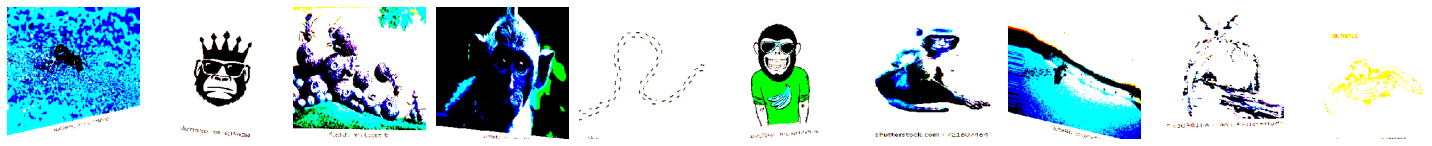

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [13]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

### Construyendo el Modelo

In [14]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [16]:
for layer in model.layers[:-7]:
    layer.trainable = False

In [17]:
model.add(Dense(units=5, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Entrenando Modelo

In [20]:
history = model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
3337/3337 - 151s - loss: 0.3558 - accuracy: 0.8892 - val_loss: 0.4747 - val_accuracy: 0.8784
Epoch 2/10
3337/3337 - 140s - loss: 0.1630 - accuracy: 0.9564 - val_loss: 0.6991 - val_accuracy: 0.8960
Epoch 3/10
3337/3337 - 142s - loss: 0.1131 - accuracy: 0.9736 - val_loss: 0.8896 - val_accuracy: 0.8960
Epoch 4/10
3337/3337 - 140s - loss: 0.0954 - accuracy: 0.9781 - val_loss: 1.2899 - val_accuracy: 0.8816
Epoch 5/10
3337/3337 - 140s - loss: 0.0606 - accuracy: 0.9859 - val_loss: 0.8847 - val_accuracy: 0.9104
Epoch 6/10
3337/3337 - 141s - loss: 0.0671 - accuracy: 0.9850 - val_loss: 1.6407 - val_accuracy: 0.8816
Epoch 7/10
3337/3337 - 142s - loss: 0.0609 - accuracy: 0.9877 - val_loss: 1.2814 - val_accuracy: 0.9200
Epoch 8/10
3337/3337 - 137s - loss: 0.0558 - accuracy: 0.9889 - val_loss: 1.1923 - val_accuracy: 0.9120
Epoch 9/10
3337/3337 - 132s - loss: 0.0544 - accuracy: 0.9897 - val_loss: 0.4602 - val_accuracy: 0.9264
Epoch 10/10
3337/3337 - 139s - loss: 0.0571 - accuracy: 0.9881 -

In [21]:
# Saving the model with it's architecture, weights and everything else
# Es opcional guardarlo, pero puede ser útil si se va a seguir usando el mismo modelo
model.save('models/animals_model.h5')


<h2>Evaluación y métricas de desempeño</h2>

### Cargando un modelo que fue guardado (opcional correrlo)

#### Nota
Si se carga este modelo y no se tiene el valor de las variables anteriores, no se podrá ver las gráficas de la sección "Gráficas de Desempeño" a continuación.  
Esto debido a que el archivo del modelo no guarda los valores que ahí se utilizan.

In [30]:
from tensorflow.keras.models import load_model

In [31]:
trained_model = load_model('models/animals_model.h5')
trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [32]:
trained_model.evaluate(x=train_batches)

3337/3337 [==============================] - 96s 29ms/step - loss: 0.0052 - accuracy: 0.9983


[0.005224589258432388, 0.9983214139938354]

### Gráficas de desempeño

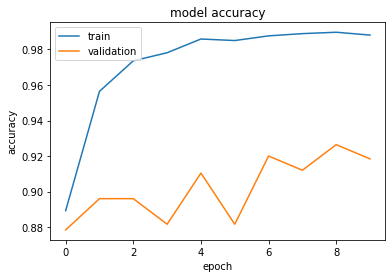

In [22]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

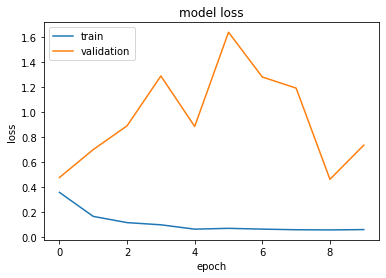

In [23]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Matriz de confusión

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

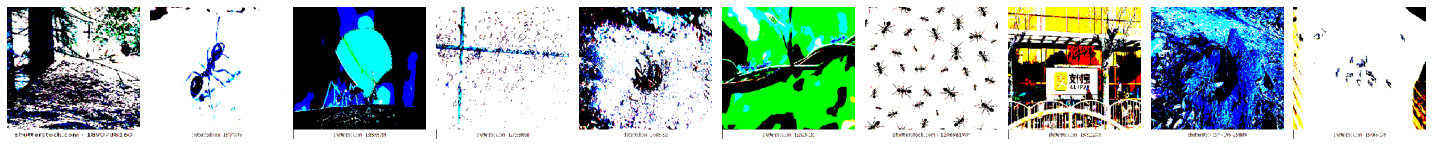

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [24]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [26]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [27]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[218   2   9   6  10]
 [  1 227   9   5   7]
 [  1  10 220   6   8]
 [  4   5   5 232   5]
 [  1   2   3   8 235]]


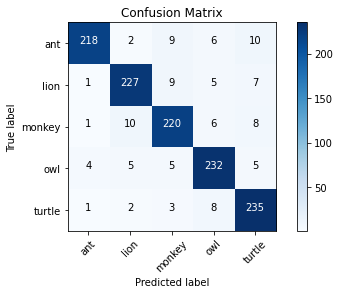

In [29]:
cm_plot_labels = ['ant', 'lion', 'monkey', 'owl', 'turtle']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')